In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#ml modelling pipeline
#data ingestion >> reading from a  data source >>> sql , excel etc
#data validatioin >>  sanity check
#eda
#data preprocessing
#model building

In [3]:
app_train =pd.read_csv("application_train.csv")

In [4]:
app_train.shape

(307511, 122)

In [5]:
app_test =pd.read_csv("application_test.csv")
app_test.shape

(48744, 121)

In [6]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
app_train.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [8]:
#observation
#Target is discrete and Target is given >> Supervised Learning problem >> classification problem
#business team will decide the target

In [9]:
app_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [10]:
missing_percentage=((app_train.isna().sum() / len(app_train))*100).sort_values(ascending=False)
missing_percentage

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

67

In [12]:
# there are 87 columns which has missing value

In [13]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [14]:
# we have to do encoding integer for the above 16 object  columns

In [15]:
app_train.select_dtypes("object")

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


In [16]:
app_train.select_dtypes("object").apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [17]:
# in one hot encoding if there are 58 unique values then 58 new columns will be created

In [18]:
cat_df=app_train.select_dtypes("object")

In [19]:
cat_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


In [20]:
app_train=pd.get_dummies(app_train,dtype="int")#separate the cat data and do one hot encoding or directly do in main data
# get dummies convet all of this into binary format 0 and 1
# by default it works only one cat columns so it convert cat columns into binary 0 and 1 dtypes int means give int value rather bool float etc
app_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,0,0,1,0,1,0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0,0,0,1,0,1,0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,0,1,0,0,1,0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0,0,1,0,1,0


In [21]:
# this u also have to perform in app_test data
app_test=pd.get_dummies(app_test,dtype="int")
app_test

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,0,0,0,0,0,0,0,0,0,0
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,0,0,0,0,1,0,0,1,0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970,-5169,-9094.0,...,0,0,0,0,0,0,0,0,0,0
48740,456222,2,157500.0,622413.0,31909.5,495000.0,0.035792,-11186,-1149,-3015.0,...,0,0,0,0,0,0,0,0,0,0
48741,456223,1,202500.0,315000.0,33205.5,315000.0,0.026392,-15922,-3037,-2681.0,...,0,0,0,0,0,0,1,0,1,0
48742,456224,0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968,-2731,-1461.0,...,0,0,0,0,0,1,0,0,1,0


In [22]:
app_train.shape

(307511, 246)

In [23]:
app_test.shape

(48744, 242)

In [24]:
# train and test data is not aligned, there is difference of 3 rows excluding target

train_labels=app_train['TARGET']

In [25]:
app_train

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,0,0,1,0,1,0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0,0,0,1,0,1,0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,0,1,0,0,1,0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0,0,1,0,1,0


In [26]:
app_test

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,0,0,0,0,0,0,0,0,0,0
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,0,0,0,0,1,0,0,1,0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970,-5169,-9094.0,...,0,0,0,0,0,0,0,0,0,0
48740,456222,2,157500.0,622413.0,31909.5,495000.0,0.035792,-11186,-1149,-3015.0,...,0,0,0,0,0,0,0,0,0,0
48741,456223,1,202500.0,315000.0,33205.5,315000.0,0.026392,-15922,-3037,-2681.0,...,0,0,0,0,0,0,1,0,1,0
48742,456224,0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968,-2731,-1461.0,...,0,0,0,0,0,1,0,0,1,0


In [27]:
# we will align both the dataframe
app_train, app_test=app_train.align(app_test,join="inner", axis=1) #keep only columns present in both dataframe

In [28]:
app_train.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
app_test.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,0,0,0,0,0,0,0,0,0,0
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,0,0,0,0,1,0,0,1,0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
app_train['TARGET']=train_labels

In [31]:
app_train

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,1,0,1,0,1
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,1,0,0,0,0,0,0,1,0,0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,...,0,0,0,0,0,1,0,1,0,0
307507,456252,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,...,0,0,0,0,0,1,0,1,0,0
307508,456253,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,...,0,0,0,0,1,0,0,1,0,0
307509,456254,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,...,0,0,0,0,0,1,0,1,0,1


In [32]:
app_train.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,0.030090,0.007466,0.005785,0.005284,0.214757,0.210773,0.017437,0.518446,0.007570,0.080729
std,102790.175348,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.170835,0.086085,0.075840,0.072501,0.410654,0.407858,0.130892,0.499660,0.086679,0.272419
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,367142.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# when we did describe, we observed that few days are in negative, number of days employees is 1000 years
# which means there are some insane values
# might be due to wrong entry or type

In [34]:
app_train["DAYS_BIRTH"].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [35]:
(app_train["DAYS_BIRTH"]*-1/365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

<Axes: ylabel='DAYS_BIRTH'>

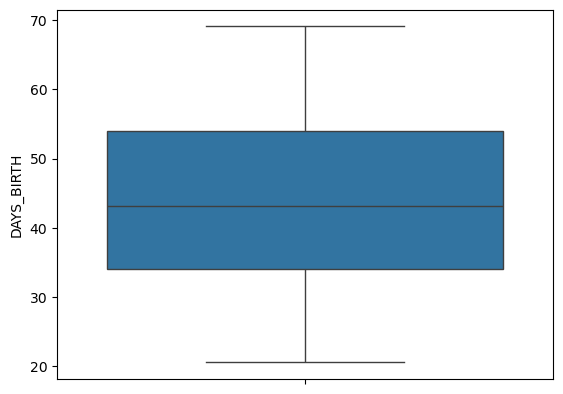

In [36]:
sns.boxplot((app_train["DAYS_BIRTH"]*-1/365))

In [37]:
# to detect outlier there are multiple ways
# Boxplot , displot
# also you can observe the diff b/w the quartiles of the data and check if there is huge
# difference in 75 percent and 100 percentile value
# if its a huge difference then outlier is present otherwise its not present
# huge means the ratios b/w previous percentile (0-25, 25-20)

In [38]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<Axes: ylabel='Frequency'>

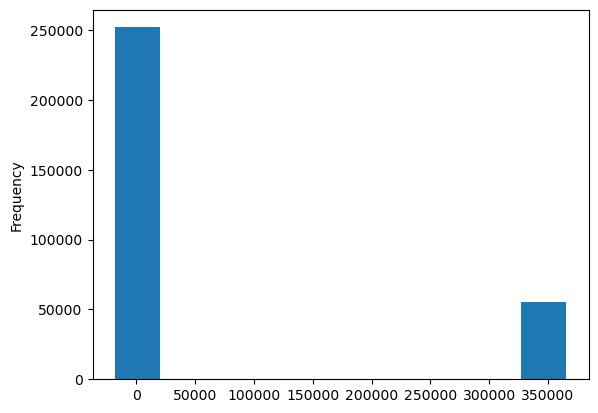

In [39]:
app_train['DAYS_EMPLOYED'].plot.hist()

In [40]:
app_train[app_train['DAYS_EMPLOYED'] ==365243]

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
8,100011,0,112500.000,1019610.0,33826.5,913500.0,0.018634,-20099,365243,-7427.0,...,0,0,0,0,0,0,0,0,0,0
11,100015,0,38419.155,148365.0,10678.5,135000.0,0.015221,-20417,365243,-5246.0,...,0,0,0,0,0,0,0,0,0,0
23,100027,0,83250.000,239850.0,23850.0,225000.0,0.006296,-24827,365243,-9012.0,...,0,1,0,0,0,0,0,1,0,0
38,100045,0,99000.000,247275.0,17338.5,225000.0,0.006207,-23920,365243,-9817.0,...,0,0,0,0,0,1,0,1,0,0
43,100050,0,108000.000,746280.0,42970.5,675000.0,0.010966,-23548,365243,-5745.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,202500.000,703728.0,29943.0,607500.0,0.031329,-22414,365243,-11976.0,...,0,0,0,0,0,1,0,1,0,0
307483,456227,0,99000.000,247275.0,16479.0,225000.0,0.007330,-24911,365243,-11211.0,...,0,0,0,0,0,1,0,1,0,0
307487,456231,0,117000.000,1071909.0,31473.0,936000.0,0.010147,-23125,365243,-5485.0,...,0,0,0,0,0,0,0,0,0,0
307505,456249,0,112500.000,225000.0,22050.0,225000.0,0.022800,-24384,365243,-7369.0,...,0,0,0,0,1,0,0,1,0,0


In [41]:
# there are 55374 anomalous days of employment
55374/len(app_train)

0.18007160719453938

In [42]:
#DAYS_EMPLOYED is one of the important Variable
#what to do, mean, median, mode or drop, capping >>???
#there is no business team, we can make a column which will flag that its anomaly and put np.nan for the outlier values in orignal coloumn

In [43]:
app_train['DAYS_EMPLOYED']

0           -637
1          -1188
2           -225
3          -3039
4          -3038
           ...  
307506      -236
307507    365243
307508     -7921
307509     -4786
307510     -1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

In [44]:
app_train["DAYS_EMPLOYED_ANOM"]= app_train['DAYS_EMPLOYED'] == 365243

In [45]:
app_train["DAYS_EMPLOYED"].replace({365243:np.nan}, inplace=True)

<Axes: ylabel='Frequency'>

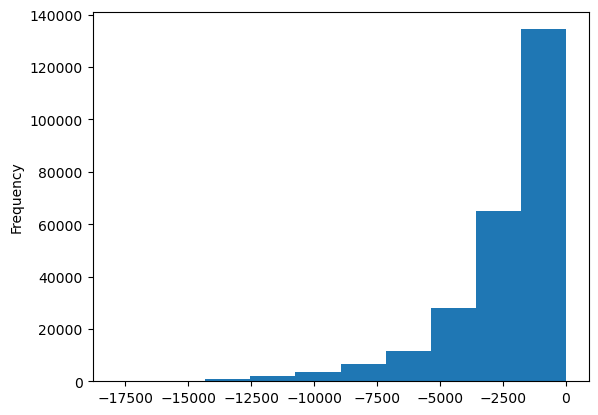

In [46]:
app_train["DAYS_EMPLOYED"].plot.hist()

In [47]:
len(app_test[app_test['DAYS_EMPLOYED'] ==365243])

9274

In [48]:
app_test["DAYS_EMPLOYED_ANOM"]= app_test['DAYS_EMPLOYED'] == 365243
app_test["DAYS_EMPLOYED"].replace({365243:np.nan}, inplace=True)

In [49]:
app_test.columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'WALLSMATERIAL_MODE_Block', 'WALLSMATERIAL_MODE_Mixed',
       'WALLSMATERIAL_MODE_Monolithic', 'WALLSMATERIAL_MODE_Others',
       'WALLSMATERIAL_MODE_Panel', 'WALLSMATERIAL_MODE_Stone, brick',
       'WALLSMATERIAL_MODE_Wooden', 'EMERGENCYSTATE_MODE_No',
       'EMERGENCYSTATE_MODE_Yes', 'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=243)

In [50]:
# correlation can help you know which are the most important variable for target

In [51]:
app_train.corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM
SK_ID_CURR,1.000000,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,-0.000084,-0.000973,...,-0.000976,0.000072,-0.001396,0.002300,-0.001281,-0.000270,0.000510,0.002549,-0.002108,0.001368
CNT_CHILDREN,-0.001129,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,0.061145,0.183395,...,-0.000709,0.001607,-0.002032,-0.020892,-0.025088,0.011036,-0.038644,0.004525,0.019187,-0.240722
AMT_INCOME_TOTAL,-0.001820,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.013005,0.027805,...,0.006149,0.023886,0.003886,0.032753,0.016523,-0.003369,0.050174,-0.002894,-0.003982,-0.064038
AMT_CREDIT,-0.000343,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.091295,0.009621,...,0.007987,0.027255,0.005799,0.046644,0.009756,-0.007373,0.058256,-0.004308,-0.030369,-0.065594
AMT_ANNUITY,-0.000433,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.053604,0.038514,...,0.010077,0.035318,0.005968,0.054988,0.009189,-0.007711,0.068145,-0.003910,-0.012817,-0.103608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WALLSMATERIAL_MODE_Wooden,-0.000270,0.011036,-0.003369,-0.007373,-0.007711,-0.009135,-0.056263,0.008758,0.007179,0.000159,...,-0.011554,-0.010162,-0.009710,-0.069666,-0.068843,1.000000,0.078964,0.273271,0.007946,-0.002945
EMERGENCYSTATE_MODE_No,0.000510,-0.038644,0.050174,0.058256,0.068145,0.062878,0.103513,-0.019852,-0.028165,-0.069039,...,0.076786,0.073260,0.060550,0.502903,0.491544,0.078964,1.000000,-0.090624,-0.042201,-0.010526
EMERGENCYSTATE_MODE_Yes,0.002549,0.004525,-0.002894,-0.004308,-0.003910,-0.004848,-0.029932,0.005434,0.004494,-0.006273,...,0.031648,-0.005178,0.049521,-0.039280,-0.007605,0.273271,-0.090624,1.000000,0.004829,-0.003633
TARGET,-0.002108,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,0.074958,0.041975,...,-0.001713,-0.009384,0.000628,-0.033119,-0.012657,0.007946,-0.042201,0.004829,1.000000,-0.045987


In [52]:
correlations =app_train.corr()["TARGET"].sort_values()
correlations

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
                                          ...   
REGION_RATING_CLIENT                    0.058899
REGION_RATING_CLIENT_W_CITY             0.060893
DAYS_EMPLOYED                           0.074958
DAYS_BIRTH                              0.078239
TARGET                                  1.000000
Name: TARGET, Length: 244, dtype: float64

In [53]:
correlations.head(15)

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
DAYS_EMPLOYED_ANOM                     -0.045987
ORGANIZATION_TYPE_XNA                  -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
EMERGENCYSTATE_MODE_No                 -0.042201
HOUSETYPE_MODE_block of flats          -0.040594
AMT_GOODS_PRICE                        -0.039645
REGION_POPULATION_RELATIVE             -0.037227
Name: TARGET, dtype: float64

In [54]:
correlations.tail(15)

OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

In [55]:
app_train["DAYS_BIRTH"]=abs(app_train["DAYS_BIRTH"])

In [56]:
app_train["DAYS_BIRTH"].corr(app_train["TARGET"])

-0.07823930830982712

(array([13679., 33111., 38424., 41746., 40356., 34339., 33544., 32650.,
        27685., 11977.]),
 array([20.51780822, 25.37808219, 30.23835616, 35.09863014, 39.95890411,
        44.81917808, 49.67945205, 54.53972603, 59.4       , 64.26027397,
        69.12054795]),
 <BarContainer object of 10 artists>)

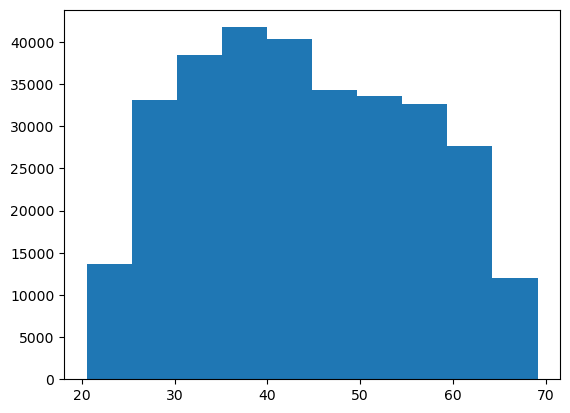

In [57]:
plt.hist(app_train["DAYS_BIRTH"]/365)

<Axes: xlabel='DAYS_BIRTH', ylabel='Density'>

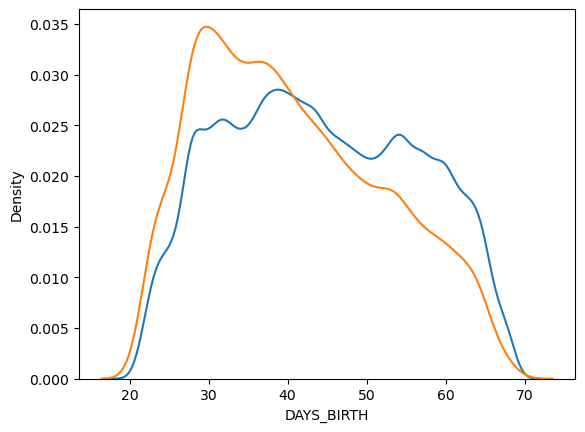

In [58]:
sns.kdeplot(app_train.loc[app_train['TARGET']==0, "DAYS_BIRTH"]/365, label="TARGET is 0")
sns.kdeplot(app_train.loc[app_train['TARGET']==1, "DAYS_BIRTH"]/365, label="TARGET is 1")

In [59]:
#observation >> younger people have paid more loans>> skewed
# but how to put this kmowledge to data and modelling

In [60]:
age_data =app_train[["TARGET","DAYS_BIRTH"]]

In [61]:
age_data["YEARS_BIRTH"] = age_data["DAYS_BIRTH"]/365

In [62]:
age_data

,TARGET,DAYS_BIRTH,YEARS_BIRTH
0,1,9461,25.920548
1,0,16765,45.931507
2,0,19046,52.180822
3,0,19005,52.068493
4,0,19932,54.608219
...,...,...,...
307506,0,9327,25.553425
307507,0,20775,56.917808
307508,0,14966,41.002740
307509,1,11961,32.769863


In [63]:
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num=11))

In [64]:
age_data

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
...,...,...,...,...
307506,0,9327,25.553425,"(25.0, 30.0]"
307507,0,20775,56.917808,"(55.0, 60.0]"
307508,0,14966,41.002740,"(40.0, 45.0]"
307509,1,11961,32.769863,"(30.0, 35.0]"


In [65]:
age_groups = age_data.groupby('YEARS_BINNED').mean()

<BarContainer object of 10 artists>

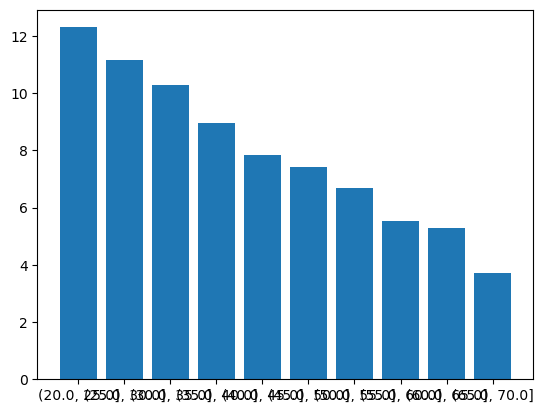

In [66]:
plt.bar(age_groups.index.astype(str), age_groups['TARGET']*100)

In [67]:
app_train

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,-637.0,-3648.0,...,0,0,0,0,1,0,1,0,1,False
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,-1188.0,-1186.0,...,0,0,0,0,0,0,1,0,0,False
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,-225.0,-4260.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,-3039.0,-9833.0,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,-3038.0,-4311.0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,157500.0,254700.0,27558.0,225000.0,0.032561,9327,-236.0,-8456.0,...,0,0,0,0,1,0,1,0,0,False
307507,456252,0,72000.0,269550.0,12001.5,225000.0,0.025164,20775,NaN,-4388.0,...,0,0,0,0,1,0,1,0,0,True
307508,456253,0,153000.0,677664.0,29979.0,585000.0,0.005002,14966,-7921.0,-6737.0,...,0,0,0,1,0,0,1,0,0,False
307509,456254,0,171000.0,370107.0,20205.0,319500.0,0.005313,11961,-4786.0,-2562.0,...,0,0,0,0,1,0,1,0,1,False


In [68]:
#make a base model Logistic regression without feature engineering here (do null value tratment)
#do feature engineering
#and then again build the model
#here i am moving ahead with model building directly

In [69]:
app_train.columns[app_train.columns.str.startswith("EXT_S")]

Index(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], dtype='object')

In [70]:
app_train.shape

(307511, 244)

In [71]:
app_train.columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes', 'TARGET',
       'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=244)

In [72]:
ext_data=app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
ext_data.corr()

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.155317,-0.160472,-0.178919
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000


<Axes: >

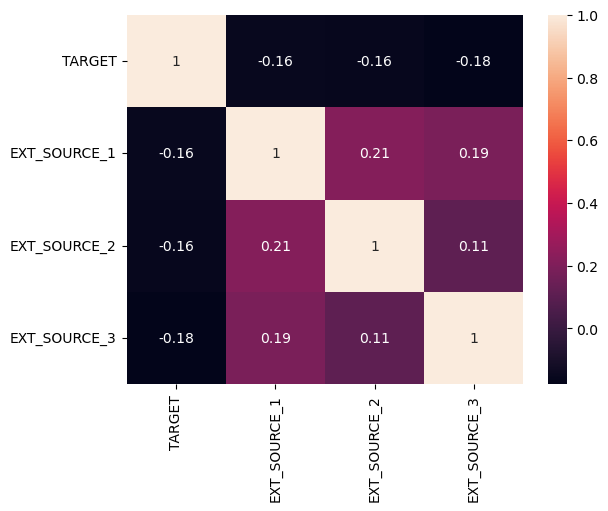

In [73]:
sns.heatmap(ext_data.corr(), annot=True)

0 EXT_SOURCE_1
1 EXT_SOURCE_2
2 EXT_SOURCE_3


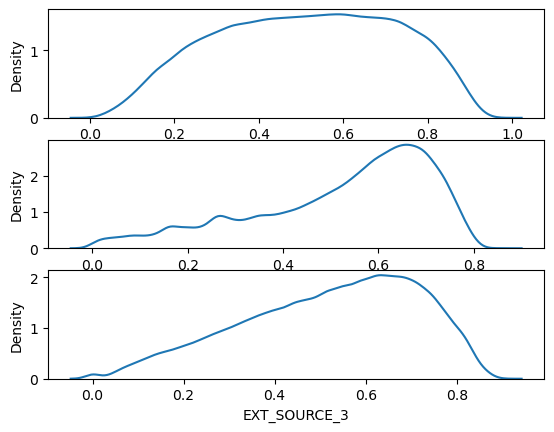

In [74]:
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    print(i, source)
    plt.subplot(3, 1, i+1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label='target 0')

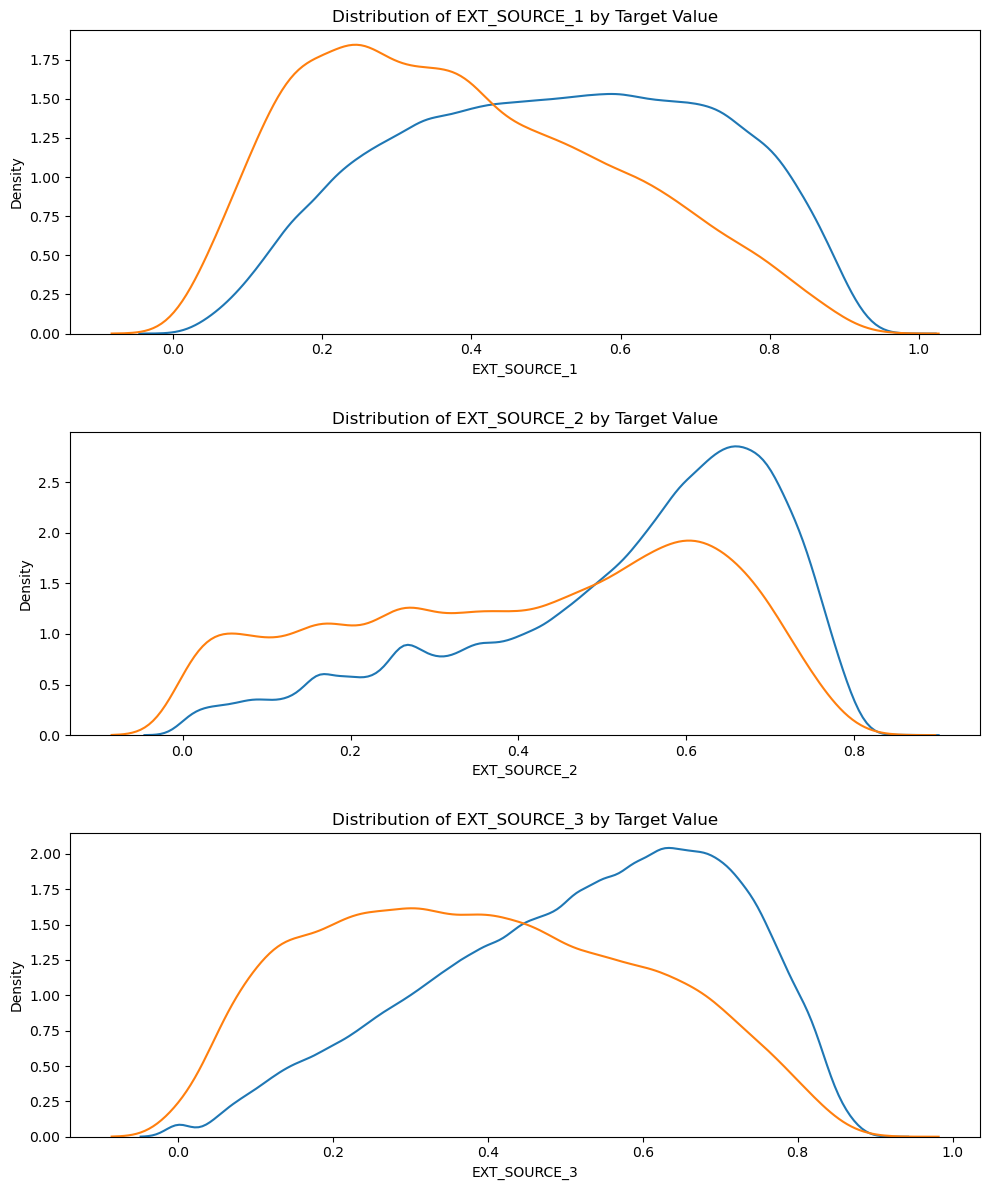

In [75]:
plt.figure(figsize= (10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label='target 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label='target 1')
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');

plt.tight_layout(h_pad= 2.5)

In [76]:
# short cut below 

In [77]:
#app_train.shape

In [78]:
#app_test.shape

In [79]:
#app_train = app_train.fillna(0)
#app_test = app_test.fillna(0)

In [80]:
#app_test.isna().sum()

In [81]:
#app_train.isna().sum()

In [82]:
#y = app_train['TARGET']
#X = app_train.drop('TARGET', axis=1)

In [83]:
#X

In [84]:
#y

In [85]:
#from sklearn.linear_model import LogisticRegression

#clf= LogisticRegression()
#clf

In [86]:
#clf.fit(X,y)

In [87]:
#clf.coef_

In [88]:
#y_pred=clf.predict(X)

In [89]:
#from sklearn.metrics import accuracy_score
#accuracy_score(y,y_pred)

In [90]:
# short cut end just deploy model but in ml it dosent work like that 

In [91]:
#############################################

In [92]:
# seeing above plot we understand tha there is some relationship b/w people paid loan and not paid loan 
# but linear correlation is not clear

In [93]:
poly_features=app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH']]
poly_features_test=app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH']]

In [94]:
from sklearn.impute import SimpleImputer
poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns =['TARGET'])

In [95]:
imputer=SimpleImputer(strategy='median')
poly_features_imputed= imputer.fit_transform(poly_features)
poly_features_test_imputed= imputer.fit_transform(poly_features_test)

In [96]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree =3)
poly_transformer.fit(poly_features_imputed)

PolynomialFeatures(degree=3)

In [97]:
poly_features= poly_transformer.transform(poly_features_imputed)
poly_features_test= poly_transformer.transform(poly_features_test_imputed)

In [98]:
poly_features.shape

(307511, 35)

In [99]:
poly_features_test.shape

(48744, 35)

In [100]:
poly_transformer.get_feature_names_out(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH'])

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2', 'EXT_SOURCE_1^3',
       'EXT_SOURCE_1^2 EXT_SOURCE_2', 'EXT_SOURCE_1^2 EXT_SOURCE_3',
       'EXT_SOURCE_1^2 DAYS_BIRTH', 'EXT_SOURCE_1 EXT_SOURCE_2^2',
       'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
       'EXT_SOURCE_1 EXT_SOURCE_3^2',
       'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
       'EXT_SOURCE_1 DAYS_BIRTH^2', 'EXT_SOURCE_2^3',
       'EXT_SOURCE_2^2 EXT_SOURCE_3', 'EXT_SOURCE_2^2 DAYS_BIRTH',
       'EXT_SOURCE_2 EXT_SOURCE_3^2',
       'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
       'EXT_SOURCE_2 DAYS_BIRTH^2', 'EXT_SOURCE_3^3',
       'EXT_SOURCE_3^2 DAYS_BIRTH', 'EXT_SOURCE_3 DAYS_BIR

In [101]:
poly_features =pd.DataFrame(poly_features,
                            columns=poly_transformer.get_feature_names_out(
                                ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH']
                            ))
poly_features["TARGET"] = poly_target.values
poly_corrs = poly_features.corr()["TARGET"].sort_values()



poly_corrs

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH     -0.155891
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH     -0.151816
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
EXT_SOURCE_3 DAYS_BIRTH                  -0.150109
EXT_SOURCE_2^2                           -0.149512
EXT_SOURCE_2^2 DAYS_BIRTH                -0.149313
EXT_SOURCE_3^2 DAYS_BIRTH                -0.141777
EXT_SOURCE_3^2                           -0.141662
EXT_SOURCE_2^3                 

In [102]:
# Put test features into dataframe with correct feature names
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns=poly_transformer.get_feature_names_out(
                                      ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']
                                  ))

# Add SK_ID_CURR to train and test polynomial feature sets
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']

# Merge polynomial features into training and testing data
app_train_poly = app_train.merge(poly_features, on='SK_ID_CURR', how='left')
app_test_poly = app_test.merge(poly_features_test, on='SK_ID_CURR', how='left')

# Align the dataframes by keeping only the columns present in both
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join='inner', axis=1)

# Output new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)


Training data with polynomial features shape:  (307511, 278)
Testing data with polynomial features shape:   (48744, 278)


In [103]:
app_train.columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes', 'TARGET',
       'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=244)

In [104]:
app_train_domain=app_train.copy()

In [105]:
app_test_domain=app_test.copy()

In [106]:
app_train_domain["CREDIT_INCOME_PERCENT"]=app_train_domain['AMT_CREDIT']/app_train_domain['AMT_INCOME_TOTAL']

In [107]:
app_train_domain["DAYS_EMPLOYED_PERCENT"]=app_train_domain['DAYS_EMPLOYED']/app_train_domain['DAYS_BIRTH']

In [108]:
app_test_domain["CREDIT_INCOME_PERCENT"]=app_test_domain['AMT_CREDIT']/app_test_domain['AMT_INCOME_TOTAL']

In [109]:
app_test_domain["DAYS_EMPLOYED_PERCENT"]=app_test_domain['DAYS_EMPLOYED']/app_test_domain['DAYS_BIRTH']

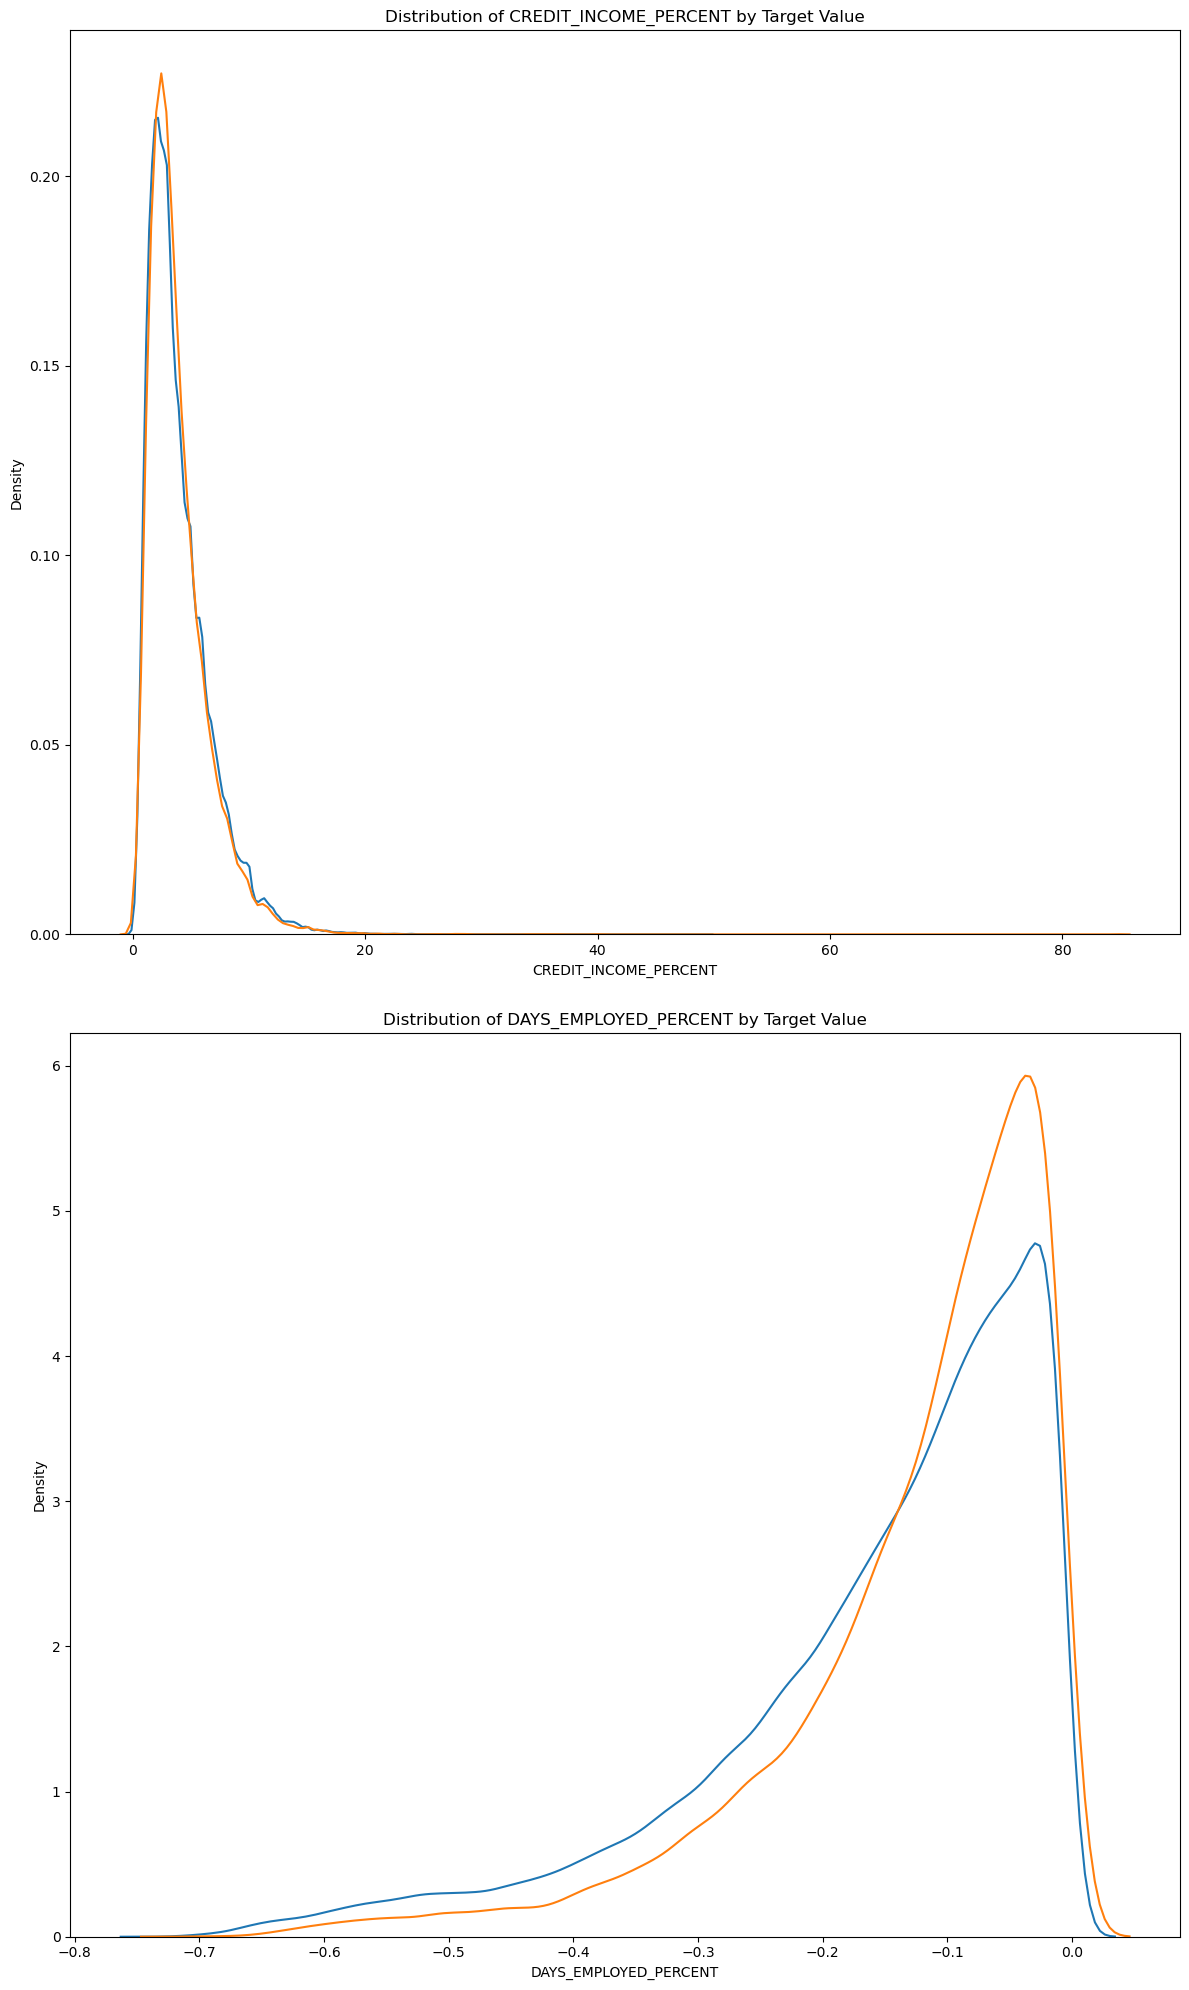

In [110]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(2, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [111]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

if "TARGET" in app_train:
    train = app_train.drop(columns=["TARGET"])
else:
    train= app_train.copy()

test=app_test.copy()

train, test= train.align(test, join="inner", axis=1)

imputer= SimpleImputer(strategy="median")
scaler= MinMaxScaler()

In [112]:
imputer

SimpleImputer(strategy='median')

In [113]:
scaler

MinMaxScaler()

In [114]:
#fit and transform will happen on train and only transform will happen only on test data
#reason>> to avoid data leakage

In [115]:
train= imputer.fit_transform(train)
test=imputer.transform(test)

In [116]:
train= scaler.fit_transform(train)
test=scaler.transform(test)

In [117]:
train_labels.shape

(307511,)

In [118]:
train.shape

(307511, 243)

In [119]:
X=train
y=train_labels

In [120]:
from sklearn.linear_model import LogisticRegression
log_reg =LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [121]:
y_pred=log_reg.predict(X)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_score(y, y_pred)

0.9191703711411949

In [123]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    282686
           1       0.47      0.01      0.02     24825

    accuracy                           0.92    307511
   macro avg       0.70      0.50      0.49    307511
weighted avg       0.88      0.92      0.88    307511



In [124]:
from sklearn.naive_bayes import GaussianNB
g_clf =GaussianNB()
g_clf.fit(X,y)

GaussianNB()

In [125]:
y_pred=g_clf.predict(X)
print(accuracy_score(y,y_pred))
print(classification_report(y, y_pred))

0.1853689786706817
              precision    recall  f1-score   support

           0       0.95      0.12      0.21    282686
           1       0.09      0.93      0.16     24825

    accuracy                           0.19    307511
   macro avg       0.52      0.53      0.18    307511
weighted avg       0.88      0.19      0.21    307511



In [126]:
#from sklearn.svm import SVC

#svc = SVC(kernel = "linear")

#svc.fit(X,y)


In [127]:
#y_pred=svc.predict(X)
#print(accuracy_score(y,y_pred))
#print(classification_report(y, y_pred))

In [128]:
# from sklearn.ensemble import RandomForestClassifier
# rclf =RandomForestClassifier()
# rclf.fit(X,y)

#y_pred= g_clf.predict(X)
# print(accuracy_score(y,y_pred))
# print(classifiaction_report(y,y_pred))

In [133]:
#!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 4.2 MB/s eta 0:00:14
   - -------------------------------------- 1.6/56.8 MB 4.0 MB/s eta 0:00:14
   - -------------------------------------- 2.4/56.8 MB 3.8 MB/s eta 0:00:15
   -- ------------------------------------- 3.1/56.8 MB 3.8 MB/s eta 0:00:15
   -- ------------------------------------- 3.7/56.8 MB 3.5 MB/s eta 0:00:16
   -- ------------------------------------- 3.9/56.8 MB 3.2 MB/s eta 0:00:17
   --- ------------------------------------ 4.5/56.8 MB 2.9 MB/s eta 0:00:18
   --- ------------------------------------ 5.0/56.8 MB 2.8 MB/s eta 0:00:19
   --- ------------------------------------ 5.2/56.8 MB 2.8 MB/s eta 0:00:19
   ---- ----------------------------------- 5.8/56.8 MB 2.8 MB/s eta 0:00:19
   ---- ----------------------------------- 6.0/56.8 MB 2.7 MB/s eta 0:00:19
   ---- ----------------------------------- 6.3/56.8 MB 2.5 MB/s eta 0:00:21
   ---

In [134]:
import xgboost as xgb
model=xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

In [135]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [137]:
param_grid={
    "n_estimators":[100,200],
"max_depth":[3,5,7],
"learning_rate":[0.01,0.1,0.2],
"subsample":[0.8,1.0],
"colsample_bytree":[0.8,1.0],
"gamma":[0,1]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search =GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=3,
                          scoring="accuracy",
                          verbose=1,
                          n_jobs=-1)

grid_search.fit(X,y)


Fitting 3 folds for each of 144 candidates, totalling 432 fits
